In [8]:
import chardet

# Read the file in binary mode
with open('Map2_data.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # sample 10KB
    print(result)


{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


In [13]:
!pip install statsmodels



Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 8.0 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [10]:
import pandas as pd

# Try reading as a tab-separated file with UTF-16 encoding
df = pd.read_csv('Map2_data.csv', encoding='utf-16', sep='\t', engine='python')

# Display a sample
print(df.head())


  City of Residence Country They Are From Current City Current Country  \
0       New Bedford                 Haiti      Unknown             NaN   
1             Azusa                Mexico      Unknown             NaN   
2            Fulton             Guatemala      Unknown             NaN   
3       New Bedford               Unknown      Unknown             NaN   
4           Unknown               Unknown  Panama City          Panama   

  Current State currrent country2 Date Disappered  \
0       Unknown               NaN      10/18/2024   
1       Unknown               NaN       1/15/2025   
2      New York               NaN        1/8/2024   
3       Unknown               NaN      10/21/2024   
4        Panama               NaN      12/22/2023   

                                                Name Name of Faciility  \
0                Unidentified Massachusetts resident           Unknown   
1                  Unidentified Azusa father/husband           Unknown   
2             

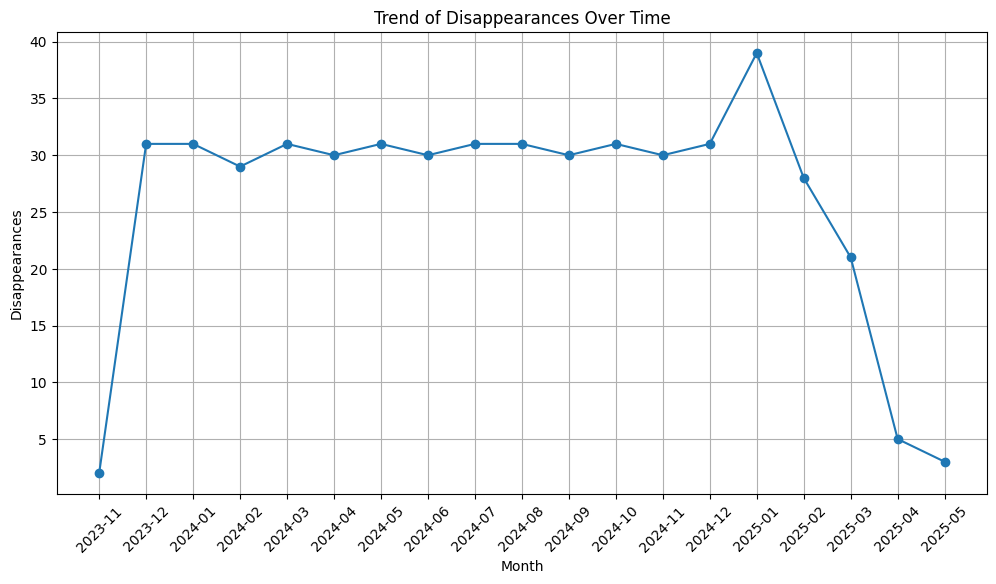

ValueError: x and y must have same first dimension, but have shapes (12,) and (13,)

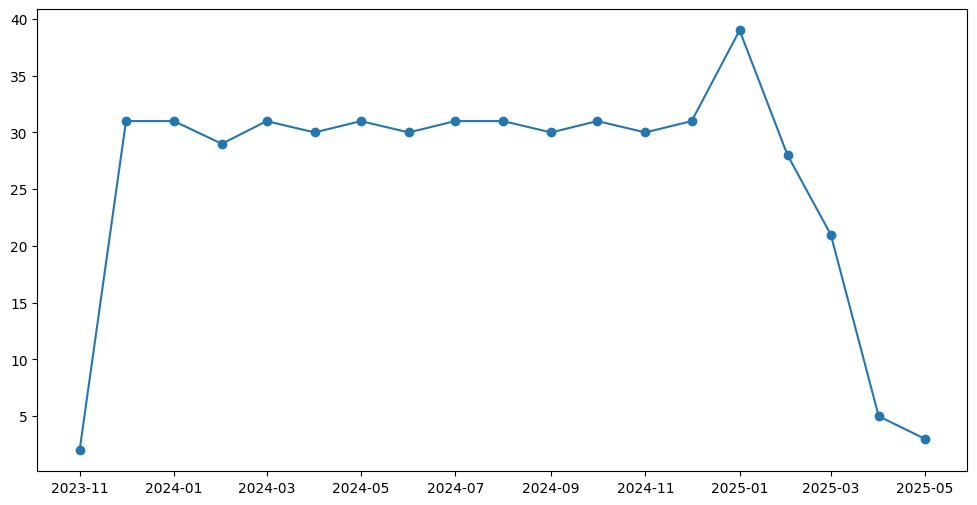

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset with proper encoding and error handling
df = pd.read_csv("Map2_data.csv", encoding="utf-16", delimiter="\t", on_bad_lines="skip")


# Convert 'Date Disappered' to datetime, handling errors gracefully
df['Date Disappered'] = pd.to_datetime(df['Date Disappered'], errors='coerce')

# Remove rows with NaN dates
df = df.dropna(subset=['Date Disappered'])

# Aggregate by month
df['YearMonth'] = df['Date Disappered'].dt.to_period('M')
ts_data = df.groupby('YearMonth').size()

# Visualize the time series using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index.astype(str), ts_data.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Disappearances")
plt.title("Trend of Disappearances Over Time")
plt.grid(True)
plt.show()


# Ensure datetime conversion
ts_data.index = ts_data.index.to_timestamp()

# Fix ARIMA model warning
model = ARIMA(ts_data, order=(2, 1, 2), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Generate forecast
forecast = model_fit.predict(start=len(ts_data), end=len(ts_data) + 12)

# Corrected forecasting plot
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data.values, label="Observed", marker='o', linestyle='-')

# Ensure the forecast aligns correctly
plt.plot(pd.date_range(ts_data.index[-1], periods=12, freq='ME'),  # Updated frequency
         forecast, label="Forecast", linestyle="dashed", color="red")

plt.xlabel("Month")
plt.ylabel("Disappearances")
plt.title("Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()



In [19]:
print(df.columns)

Index(['City of Residence\tCountry They Are From\tCurrent City\tCurrent Country\tCurrent State\tcurrrent country2\tDate Disappered\tName\tName of Faciility\tNotes\tPersonal\tState of Residence\tState residence\tStatus\tDate Disappered\tNotes\tPersonal\tdetained\tres\tres_det_line\tLatitude (generated)\tLongitude (generated)\tcount'], dtype='object')


In [32]:
print(len(pd.date_range(ts_data.index[-1], periods=12, freq='ME')))  # Should be 12
print(len(forecast))  # Should be 12, but likely 13
#reducing forecast to 12 
forecast = forecast.iloc[:12]  # Keep only the first 12 predictions
forecast = model_fit.predict(start=len(ts_data), end=len(ts_data) + 11)  # End at +11 to get exactly 12 values



12
12


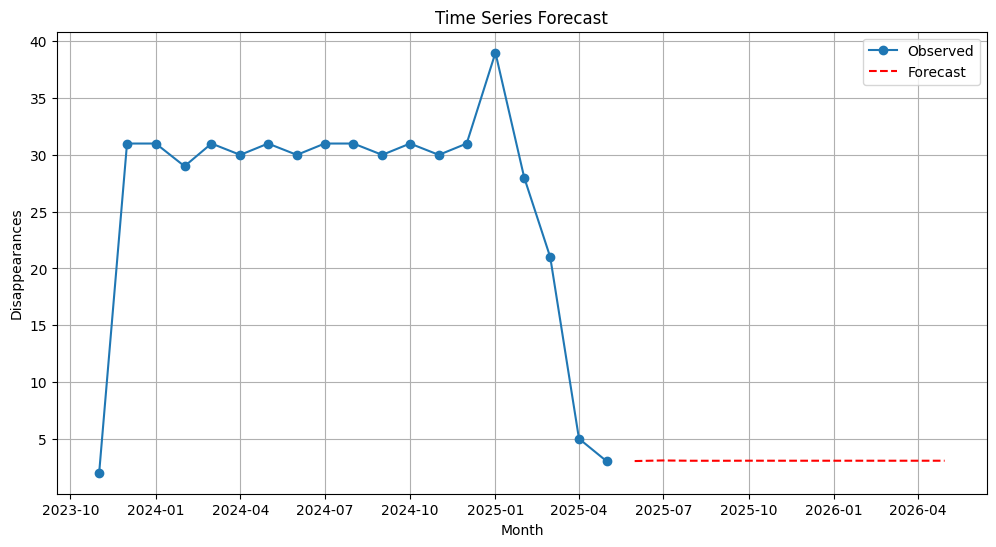

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data.values, label="Observed", marker='o', linestyle='-')

# Ensure forecast length matches the generated date range
plt.plot(pd.date_range(ts_data.index[-1], periods=12, freq='ME'), 
         forecast, label="Forecast", linestyle="dashed", color="red")

plt.xlabel("Month")
plt.ylabel("Disappearances")
plt.title("Time Series Forecast")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("deporation-time_series_forecast.png", dpi=300)  # Saves at high resolution
